In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from PIL import Image

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
#return type of pandas.read_csv is DataFrame
data  = pd.read_csv("/home/devops/Documents/Practice-Python/Shakespeare_data.csv" , sep = ',')

FileNotFoundError: File b'/home/devops/Documents/Practice-Python/Shakespeare_data.csv' does not exist

In [8]:
wordcld = pd.Series(data['PlayerLine'].tolist()).astype(str)

NameError: name 'data' is not defined

In [9]:
image = np.array(Image.open("/home/devops/Documents/Practice-Python/william-shakespeare-black-silhouette.png"))

In [11]:
from wordcloud import WordCloud

In [12]:
wc = WordCloud(mask = image, margin=1, max_font_size=125)

In [13]:
wc.generate(' '.join(wordcld.astype(str)))

In [14]:
#store to file
wc.to_file('/home/devops/Documents/Practice-Python/shakespear.png')

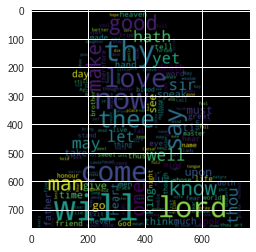

In [15]:
#plot
plt.imshow(wc,interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

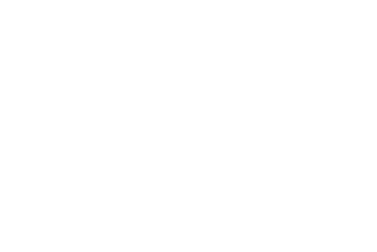

In [16]:
plt.axis('off')

In [17]:
plt.figure()

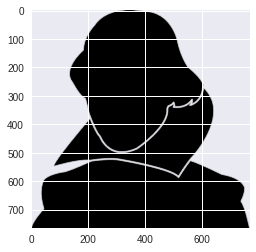

In [18]:
plt.imshow(image, cmap = plt.cm.gray , interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

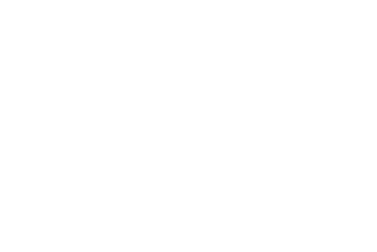

In [19]:
plt.axis('off')

In [20]:
plt.show()

In [10]:
data.head(8)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [11]:
data['Player'].replace(np.nan,'Other',inplace = True)

In [12]:
data.head(8)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [13]:
#group the players according to play

play = data.groupby('Play').count().sort_values(by = 'PlayerLine',ascending = False)['PlayerLine']


In [14]:
#convert play data to frame
play = play.to_frame()

In [15]:
play['Play'] = play.index.tolist()

In [17]:
play.index

Index(['Hamlet', 'Coriolanus', 'Cymbeline', 'Richard III',
       'Antony and Cleopatra', 'King Lear', 'Othello', 'Troilus and Cressida',
       'A Winters Tale', 'Henry VIII', 'Henry V', 'Henry VI Part 2',
       'Romeo and Juliet', 'Henry IV', 'Henry VI Part 3',
       'Alls well that ends well', 'Measure for measure', 'Loves Labours Lost',
       'Henry VI Part 1', 'Richard II', 'Merry Wives of Windsor',
       'As you like it', 'Taming of the Shrew', 'Merchant of Venice',
       'Julius Caesar', 'King John', 'Titus Andronicus',
       'Much Ado about nothing', 'Timon of Athens', 'Twelfth Night',
       'Pericles', 'macbeth', 'The Tempest', 'Two Gentlemen of Verona',
       'A Midsummer nights dream', 'A Comedy of Errors'],
      dtype='object', name='Play')

In [18]:
#convert this str index which is play(name) to numbers
play.index  = np.arange(0,len(play)) 

In [19]:
play

,PlayerLine,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


In [20]:
#now analysing player info
no_player  = data.groupby(['Play'])['Player'].nunique().sort_values(ascending = False).to_frame()

In [21]:
no_player['Play'] = no_player.index.tolist()

In [22]:
no_player.index

Index(['Richard III', 'Henry VI Part 2', 'Coriolanus', 'Timon of Athens',
       'Antony and Cleopatra', 'Henry VI Part 1', 'Julius Caesar', 'Pericles',
       'Henry V', 'Henry VIII', 'Henry VI Part 3', 'Cymbeline', 'macbeth',
       'Taming of the Shrew', 'Richard II', 'Romeo and Juliet', 'Henry IV',
       'A Winters Tale', 'Hamlet', 'A Midsummer nights dream', 'King John',
       'Troilus and Cressida', 'Othello', 'As you like it', 'Titus Andronicus',
       'King Lear', 'Measure for measure', 'Alls well that ends well',
       'Merry Wives of Windsor', 'Merchant of Venice',
       'Much Ado about nothing', 'Loves Labours Lost', 'A Comedy of Errors',
       'The Tempest', 'Twelfth Night', 'Two Gentlemen of Verona'],
      dtype='object', name='Play')

In [23]:
no_player.index = np.arange(0 , len(no_player))

In [24]:
no_player

,Player,Play
0,71,Richard III
1,65,Henry VI Part 2
2,62,Coriolanus
3,55,Timon of Athens
4,55,Antony and Cleopatra
5,53,Henry VI Part 1
6,51,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


In [25]:
plt.figure(figsize=(150,150))

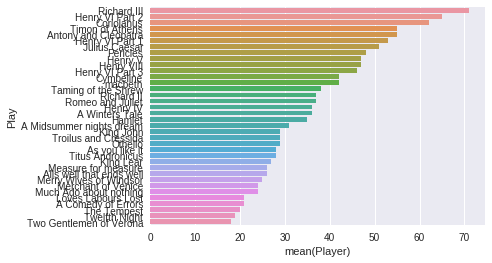

In [26]:
#plotting using sns -> seaborn
#plotting a barplot

ax = sns.barplot(data = no_player , x = 'Player' , y = 'Play')

In [27]:
ax.set(xlabel = 'Number Of Players' , ylabel = 'Play_Name')

In [28]:
fig = ax.get_figure()

In [29]:
fig.savefig('/home/devops/Documents/Practice-Python/number_players.png')

In [30]:
plt.show()